In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Load your existing dataset
file_path = "/content/indian_pregnancy_food_dataset_200_unique.csv"  # Replace with your actual path
df = pd.read_csv(file_path)

# Display the initial dataset
print("Initial Dataset:")
print(df.head())




Initial Dataset:
      Food Name    Food Group Cultural Suitability  \
0       Spinach  Leafy Greens               Indian   
1    Masoor Dal        Pulses               Indian   
2        Paneer         Dairy               Indian   
3  Sesame Seeds         Seeds               Indian   
4          Ghee   Fats & Oils               Indian   

                     Dietary Tags  Trimester 1  Trimester 2  Trimester 3  \
0  Vegetarian, Vegan, Gluten-Free            1            1            1   
1  Vegetarian, Vegan, Gluten-Free            1            1            1   
2         Vegetarian, Gluten-Free            0            1            1   
3  Vegetarian, Vegan, Gluten-Free            0            0            1   
4         Vegetarian, Gluten-Free            1            1            1   

  Anemia Friendly Gestational Diabetes Friendly Hypertension Friendly  ...  \
0             Yes                           Yes                   Yes  ...   
1             Yes                           Y

In [ ]:
# Extract categorical columns for encoding
categorical_columns = ["Food Group", "Cultural Suitability", "Dietary Tags"]
numerical_columns = [
    "Energy (kcal per 100g)", "Protein (g per 100g)", "Iron (mg per 100g)",
    "Calcium (mg per 100g)", "Folate (µg per 100g)", "Vitamin C (mg per 100g)",
    "Vitamin A (IU per 100g)", "Magnesium (mg per 100g)", "Fiber (g per 100g)",
    "Omega-3 (g per 100g)", "DHA (g per 100g)", "Sodium (mg per 100g)"
]

# One-hot encode categorical columns
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df[categorical_columns]).toarray()

# Normalize numerical columns
scaler = MinMaxScaler()
normalized_numerical = scaler.fit_transform(df[numerical_columns])

# Combine encoded categorical and normalized numerical features
data_for_gan = np.hstack((encoded_categorical, normalized_numerical))

print(f"Preprocessed Data Shape: {data_for_gan.shape}")

Preprocessed Data Shape: (43, 32)


In [ ]:
categorical_feature_size = encoded_categorical.shape[1]

print(f"Categorical Feature Size: {categorical_feature_size}")

Categorical Feature Size: 20


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def build_generator(input_dim=100, output_dim=32):  # Adjust output_dim to match your feature size
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=input_dim),
        layers.BatchNormalization(momentum=0.8),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(momentum=0.8),
        layers.Dense(output_dim, activation='sigmoid')  # Outputs values between 0 and 1
    ])
    model.summary()  # Display the model architecture
    return model



def build_discriminator(input_dim=32):  # Same input dimension as Generator output
    model = tf.keras.Sequential([
        layers.Dense(256, activation='relu', input_dim=input_dim),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(1, activation='sigmoid')  # Binary classification (real or fake)
    ])
    model.summary()  # Display the model architecture
    return model




In [ ]:
# Example: Adjusting output dimensions based on your dataset
categorical_feature_size = 20  # Replace with actual size after encoding
numerical_feature_size = 12
total_output_dim = categorical_feature_size + numerical_feature_size  # Total size for Generator and Discriminator

# Update Generator and Discriminator to use the new dimension
generator = build_generator(input_dim=100, output_dim=total_output_dim)
discriminator = build_discriminator(input_dim=total_output_dim)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           8,224 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,712 (217.62 KB)

 Trainable params: 54,944 (214.62 KB)

 Non-trainable params: 768 (3.00 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 256)                 │           8,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,473 (162.00 KB)

 Trainable params: 41,473 (162.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import Model  # Import this to use Model
from tensorflow.keras import layers

# Example of building the GAN model
z = layers.Input(shape=(100,))
generated_data = generator(z)
discriminator.trainable = False  # Freeze the Discriminator
validity = discriminator(generated_data)
gan = Model(z, validity)  # This requires the correct import for 'Model'

# Compile the GAN model
gan.compile(optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), loss='binary_crossentropy')

print(f"compiled GAN model")


compiled GAN model


In [ ]:
import random
# Training Parameters
epochs = 5000
batch_size = 32
sample_interval = 500

# Sample random names for synthetic food items
food_groups = ["Leafy Greens", "Pulses", "Dairy", "Seeds", "Fruits", "Vegetables", "Cereals", "Nuts"]
cultures = ["Indian", "South Indian", "North Indian", "Gujarati", "Bengali"]

for epoch in range(epochs):
    # ---------------------
    # Train Discriminator
    # ---------------------
    # Select a random batch of real data
    idx = np.random.randint(0, data_for_gan.shape[0], batch_size)
    real_samples = data_for_gan[idx]

    # Generate a batch of fake samples
    noise = np.random.normal(0, 1, (batch_size, 100))
    fake_samples = generator.predict(noise)

    # Labels for real (1) and fake (0) samples
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Train the discriminator
    d_loss_real = discriminator.train_on_batch(real_samples, real_labels)
    d_loss_fake = discriminator.train_on_batch(fake_samples, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # ---------------------
    # Train Generator
    # ---------------------
    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress and save generated samples at intervals
    if epoch % sample_interval == 0:
        print(f"{epoch} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}%] [G loss: {g_loss}]")

        # Generate and display a synthetic sample
        sample_noise = np.random.normal(0, 1, (1, 100))
        synthetic_data = generator.predict(sample_noise)
        food_name = f"{random.choice(cultures)} {random.choice(food_groups)} {epoch // sample_interval + 1}"
        print(f"Synthetic Food Generated: {food_name}")
        print(f"Generated Nutrient Data: {synthetic_data[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py:82: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

#Q-Learning Implementation

In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd

class PregnancyFoodEnv(gym.Env):
    def __init__(self, dataset, user_input):
        super(PregnancyFoodEnv, self).__init__()

        self.user_input = user_input  # Store user input dynamically
        self.dataset = dataset  # Food dataset

        # State space: Normalized features of the food items
        self.observation_space = spaces.Box(low=0, high=1, shape=(len(dataset.columns) - 1,), dtype=np.float32)

        # Action space: Each action corresponds to selecting a food item
        self.action_space = spaces.Discrete(len(dataset))

        self.state = self._get_initial_state()

    def _get_initial_state(self):
        """Initialize the state by randomly selecting a food item (normalized)."""
        return self.dataset.sample(1).iloc[:, 1:].values.flatten()

    def step(self, action):
        """Take an action and calculate the reward based on user input and feedback."""
        selected_food = self.dataset.iloc[action]
        reward = self._calculate_dynamic_reward(selected_food)

        # Display the food item and health benefits for the user
        print(f"\nSelected Food: {selected_food['Food Name']}")
        print(f"Health Benefits: {'Anemia Friendly' if selected_food['Anemia Friendly'] == 'Yes' else 'Not Anemia Friendly'}")
        print(f"Trimester Suitability: {', '.join([t for t in ['Trimester 1' if selected_food['Trimester 1'] else '', 'Trimester 2' if selected_food['Trimester 2'] else '', 'Trimester 3' if selected_food['Trimester 3'] else ''] if t])}")
        print(f"Reward (before feedback): {reward}")

        # Ask for user feedback (like/dislike)
        user_feedback = input("Did you like this recommendation? (yes/no): ").strip().lower()

        # Adjust the reward based on user feedback
        if user_feedback == 'yes':
            reward += 10  # Positive feedback gives an extra reward
        elif user_feedback == 'no':
            reward -= 10  # Negative feedback gives a penalty

        print(f"Reward (after feedback): {reward}\n")

        done = True if reward < -10 else False  # End the episode for harmful or low-reward foods

        return self.state, reward, done, {}

    def _calculate_dynamic_reward(self, selected_food):
        """Calculate the reward for a selected food item based on user input."""
        reward = 0

        # Trimester-specific rewards
        trimester = self.user_input.get('trimester', 1)
        if trimester == 1 and selected_food['Folate (µg per 100g)'] > 100:
            reward += 15
        if trimester == 2 and selected_food['Iron (mg per 100g)'] > 5:
            reward += 20
        if trimester == 3 and selected_food['Omega-3 (g per 100g)'] > 0.1:
            reward += 25

        # Health condition-specific rewards
        health_condition = self.user_input.get('health_condition', 'none')
        if health_condition == 'anemia' and selected_food['Anemia Friendly'] == 'Yes':
            reward += 20
        if health_condition == 'gestational_diabetes' and selected_food['Gestational Diabetes Friendly'] == 'Yes':
            reward += 15
        if health_condition == 'hypertension' and selected_food['Sodium (mg per 100g)'] < 50:
            reward += 10

        # User preference reward
        dietary_preference = self.user_input.get('dietary_preference', 'none')
        if dietary_preference in selected_food['Dietary Tags']:
            reward += 10  # Reward for matching dietary preference

        # Penalties for harmful foods
        if selected_food['Sodium (mg per 100g)'] > 100:
            reward -= 20  # Large penalty for high sodium
        if health_condition == 'gestational_diabetes' and selected_food['Energy (kcal per 100g)'] > 400:
            reward -= 15  # Penalty for high-calorie foods in diabetes

        return reward

    def reset(self):
        """Reset the environment state."""
        self.state = self._get_initial_state()
        return self.state

    def render(self, mode='human'):
        pass  # Optional: Visualization can be added later

In [ ]:
user_input = {
    'trimester': 2,
    'health_condition': 'anemia',
    'dietary_preference': 'vegetarian'
}

dataset = pd.read_csv("/content/drive/MyDrive/merged_pregnancy_food_dataset.csv")  # Replace with your dataset
env = PregnancyFoodEnv(dataset=dataset, user_input=user_input)


In [ ]:
state = env.reset()
done = False
while not done:
    action = env.action_space.sample()  # Random action
    next_state, reward, done, _ = env.step(action)



Selected Food: Jackfruit
Health Benefits: Not Anemia Friendly
Trimester Suitability: Trimester 1, Trimester 2
Reward (before feedback): 20
Did you like this recommendation? (yes/no): no
Reward (after feedback): 10


Selected Food: Sunflower Seeds
Health Benefits: Not Anemia Friendly
Trimester Suitability: Trimester 2, Trimester 3
Reward (before feedback): 20
Did you like this recommendation? (yes/no): yes
Reward (after feedback): 30


Selected Food: Paneer
Health Benefits: Not Anemia Friendly
Trimester Suitability: Trimester 1, Trimester 2, Trimester 3
Reward (before feedback): 20
Did you like this recommendation? (yes/no): yes
Reward (after feedback): 30


Selected Food: Coconut
Health Benefits: Not Anemia Friendly
Trimester Suitability: Trimester 1, Trimester 2, Trimester 3
Reward (before feedback): 20
Did you like this recommendation? (yes/no): no
Reward (after feedback): 10


Selected Food: Indian Pulses 70
Health Benefits: Anemia Friendly
Trimester Suitability: Trimester 1, Trime

KeyboardInterrupt: Interrupted by user

#Handling Multiple Users using SQLite

In [ ]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect("pregnancy_q_table.db")
cursor = conn.cursor()

# Create the Q-table in the database (if not exists)
cursor.execute("""
CREATE TABLE IF NOT EXISTS q_table (
    user_id TEXT,
    state TEXT,
    action TEXT,
    q_value REAL,
    PRIMARY KEY (user_id, state, action)
);
""")
conn.commit()
conn.close()


In [ ]:
import gym
from gym import spaces
import numpy as np
import pandas as pd
import sqlite3
import random

class PregnancyFoodEnv(gym.Env):
    def __init__(self, dataset, user_id, user_input):
        super(PregnancyFoodEnv, self).__init__()

        self.conn = sqlite3.connect("pregnancy_q_table.db")
        self.cursor = self.conn.cursor()

        self.user_id = user_id
        self.user_input = user_input
        self.dataset = dataset
        self.q_table = self._load_q_table()

        self.observation_space = spaces.Box(low=0, high=1, shape=(len(dataset.columns) - 1,), dtype=np.float32)
        self.action_space = spaces.Discrete(len(dataset))

        self.state = self._get_initial_state()

    def _load_q_table(self):
        """Retrieve Q-values for the user from the database."""
        self.cursor.execute("SELECT state, action, q_value FROM q_table WHERE user_id = ?", (self.user_id,))
        q_table = {}
        for row in self.cursor.fetchall():
            q_table[(row[0], row[1])] = row[2]
        return q_table

    def _save_q_value(self, state, action, q_value):
        """Save/update Q-values in the database."""
        self.cursor.execute("""
            INSERT INTO q_table (user_id, state, action, q_value)
            VALUES (?, ?, ?, ?)
            ON CONFLICT(user_id, state, action) DO UPDATE SET q_value = ?
        """, (self.user_id, state, action, q_value, q_value))
        self.conn.commit()

    def _get_initial_state(self):
        """Initialize the state by randomly selecting a food item (normalized)."""
        return self.dataset.sample(1).iloc[:, 1:].values.flatten()

    def choose_action(self):
        """Implements ε-greedy strategy for action selection."""
        epsilon = 0.2  # 20% exploration, 80% exploitation
        state = f"{self.user_input['trimester']}, {self.user_input['health_condition']}"

        if random.uniform(0, 1) < epsilon:
            action = self.dataset.sample(1).index[0]  # Exploration: Random food item
        else:
            self.cursor.execute("SELECT action FROM q_table WHERE user_id = ? AND state = ? ORDER BY q_value DESC LIMIT 1",
                                (self.user_id, state))
            best_action = self.cursor.fetchone()
            if best_action:
                action = self.dataset.index[self.dataset['Food Name'] == best_action[0]][0]
            else:
                action = self.dataset.sample(1).index[0]  # If no history, pick random
        return action

    def step(self):
        """Use ε-greedy policy to select the best action and update rewards."""
        action = self.choose_action()
        selected_food = self.dataset.iloc[action]
        state = f"{self.user_input['trimester']}, {self.user_input['health_condition']}"
        action_name = selected_food["Food Name"]
        reward = self._calculate_dynamic_reward(selected_food)

        print(f"\nUser: {self.user_id} | Selected Food: {selected_food['Food Name']}")
        print(f"Health Benefits: {'Anemia Friendly' if selected_food['Anemia Friendly'] == 'Yes' else 'Not Anemia Friendly'}")
        print(f"Reward (before feedback): {reward}")

        user_feedback = input("Did you like this recommendation? (yes/no): ").strip().lower()
        if user_feedback == "yes":
            reward += 10
        elif user_feedback == "no":
            reward -= 10

        print(f"Reward (after feedback): {reward}")

        current_q_value = self.q_table.get((state, action_name), 0)
        new_q_value = current_q_value + 0.1 * (reward - current_q_value)
        self.q_table[(state, action_name)] = new_q_value
        self._save_q_value(state, action_name, new_q_value)

        return self.state, reward, False, {}

    def _calculate_dynamic_reward(self, selected_food):
        """Calculate reward based on trimester and health condition."""
        reward = 0
        trimester = self.user_input.get('trimester', 1)
        if trimester == 1 and selected_food['Folate (µg per 100g)'] > 100:
            reward += 15
        if trimester == 2 and selected_food['Iron (mg per 100g)'] > 5:
            reward += 20
        if trimester == 3 and selected_food['Omega-3 (g per 100g)'] > 0.1:
            reward += 25

        health_condition = self.user_input.get('health_condition', 'none')
        if health_condition == 'anemia' and selected_food['Anemia Friendly'] == 'Yes':
            reward += 20
        if health_condition == 'gestational_diabetes' and selected_food['Gestational Diabetes Friendly'] == 'Yes':
            reward += 15
        if health_condition == 'hypertension' and selected_food['Sodium (mg per 100g)'] < 50:
            reward += 10

        if selected_food['Sodium (mg per 100g)'] > 100:
            reward -= 20
        if health_condition == 'gestational_diabetes' and selected_food['Energy (kcal per 100g)'] > 400:
            reward -= 15

        return reward


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/merged_pregnancy_food_dataset.csv")  # Load dataset

user_id = input("Enter your User ID: ").strip()
trimester = int(input("Enter your trimester (1/2/3): ").strip())
health_condition = input("Enter your health condition (anemia, gestational_diabetes, hypertension, none): ").strip().lower()

user_env = PregnancyFoodEnv(dataset, user_id, {"trimester": trimester, "health_condition": health_condition})

while True:
    state = user_env.reset()
    action = user_env.choose_action()
    state, reward, done, _ = user_env.step()

    next_action = input("\n📌 Type 'switch' to switch user, or 'exit' to quit: ").strip().lower()

    if next_action in ["exit", "switch"]:
        break


Enter your User ID: user_123
Enter your trimester (1/2/3): 2
Enter your health condition (anemia, gestational_diabetes, hypertension, none): hypertension

User: user_123 | Selected Food: Watermelon
Health Benefits: Not Anemia Friendly
Reward (before feedback): 0
Did you like this recommendation? (yes/no): yes
Reward (after feedback): 10

📌 Type 'switch' to switch user, or 'exit' to quit: 

User: user_123 | Selected Food: Watermelon
Health Benefits: Not Anemia Friendly
Reward (before feedback): 0
Did you like this recommendation? (yes/no): exit
Reward (after feedback): 0

📌 Type 'switch' to switch user, or 'exit' to quit: exit


#Q-Values Visualization


In [ ]:
import sqlite3
import pandas as pd

def fetch_q_values():
    """Fetch Q-values from the database and return as a DataFrame."""
    conn = sqlite3.connect("pregnancy_q_table.db")
    cursor = conn.cursor()

    cursor.execute("SELECT user_id, state, action, q_value FROM q_table")
    data = cursor.fetchall()

    conn.close()

    df = pd.DataFrame(data, columns=["User ID", "State", "Food Item", "Q-Value"])
    return df

# Fetch and display Q-values
q_values_df = fetch_q_values()

# Instead of using 'ace_tools', display the DataFrame directly
# using the pandas 'display' function
display(q_values_df)

,User ID,State,Food Item,Q-Value
0,user_123,"Trimester 2, Anemia",Spinach,40.0000
1,user_456,"2, hypertension",North Indian Seeds 68,3.0000
2,user_456,"2, hypertension",Coconut Water,1.0000
3,user_456,"2, hypertension",Ragi (Finger Millet),4.0000
4,user_789,"1, anemia",Gujarati Leafy Greens 63,3.0000
5,user_789,"1, anemia",Almonds,4.5000
6,user_789,"1, anemia",South Indian Fats & Oils 65,0.0000
7,fuvuv,"3, anemia",Bengali Fruits 51,3.5000
8,jlenlna,"2, none",Indian Vegetables 87,1.0000
9,jlenlna,"2, none",Moong Dal,5.7000


Enter User ID to visualize Q-value trends: user_123


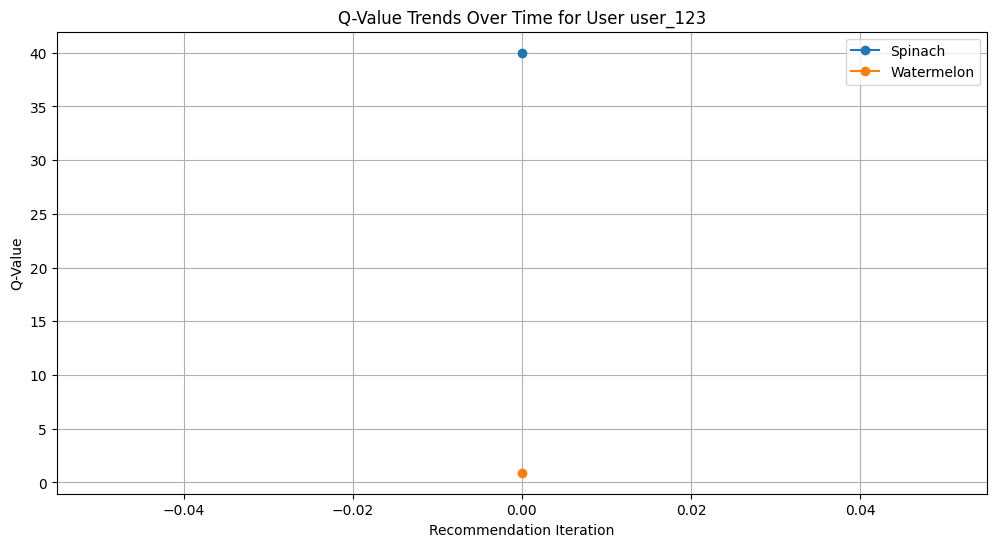

In [ ]:
import matplotlib.pyplot as plt

def plot_q_values(df, user_id):
    """Plot Q-value trends for a given user."""
    user_df = df[df["User ID"] == user_id]

    if user_df.empty:
        print(f"No data found for user: {user_id}")
        return

    plt.figure(figsize=(12, 6))

    for food_item in user_df["Food Item"].unique():
        food_df = user_df[user_df["Food Item"] == food_item]
        plt.plot(range(len(food_df)), food_df["Q-Value"], label=food_item, marker="o")

    plt.xlabel("Recommendation Iteration")
    plt.ylabel("Q-Value")
    plt.title(f"Q-Value Trends Over Time for User {user_id}")
    plt.legend()
    plt.grid(True)
    plt.show()

# Choose a user ID to visualize
user_id_input = input("Enter User ID to visualize Q-value trends: ").strip()
plot_q_values(q_values_df, user_id_input)


#DEEP Q- LEARNING MODEL


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import random
import pandas as pd
import sqlite3
import gym
from gym import spaces

class DQNFoodRecommendation:
    def __init__(self, dataset, user_input):
        self.dataset = dataset
        self.user_input = user_input
        self.num_actions = len(dataset)  # Number of food choices

        # Create the DQN model
        self.model = self.build_model()

        # Experience replay memory
        self.memory = []

    def build_model(self):
        """Builds a deep Q-network using TensorFlow/Keras."""
        model = keras.Sequential([
            layers.Dense(64, activation="relu", input_shape=(len(self.user_input),)),
            layers.Dense(64, activation="relu"),
            layers.Dense(self.num_actions, activation="linear")
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
        return model

    def remember(self, state, action, reward, next_state, done):
        """Stores experiences for replay."""
        self.memory.append((state, action, reward, next_state, done))

    def train(self, batch_size=32):
        """Trains the model using experience replay."""
        if len(self.memory) < batch_size:
            return

        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target += 0.9 * np.max(self.model.predict(next_state)[0])  # Discount factor

            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)

    def choose_action(self, state, epsilon=0.2):
        """Implements ε-greedy action selection."""
        if np.random.rand() < epsilon:
            return np.random.choice(self.num_actions)  # Explore
        return np.argmax(self.model.predict(state)[0])  # Exploit best known action


In [ ]:
# Load dataset
dataset = pd.read_csv("/content/drive/MyDrive/merged_pregnancy_food_dataset.csv")

# User input
user_input = np.array([1, 0, 0])  # Example input for trimester & health condition

# Initialize the DQN model
dqn_agent = DQNFoodRecommendation(dataset, user_input)

# Training loop
num_episodes = 100
for episode in range(num_episodes):
    state = user_input.reshape(1, -1)  # Convert input to proper shape
    done = False
    total_reward = 0

    while not done:
        action = dqn_agent.choose_action(state)
        selected_food = dataset.iloc[action]

        # Simulate reward
        reward = np.random.randint(1, 10)  # Simulate user feedback
        total_reward += reward

        # Store experience & train model
        next_state = state  # No transition in this case
        dqn_agent.remember(state, action, reward, next_state, done)
        dqn_agent.train()

        # End after one step (simplified for now)
        done = True

    print(f"Episode {episode+1}: Total Reward = {total_reward}")

print("\n✅ Training Complete!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
Episode 1: Total Reward = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Episode 2: Total Reward = 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Episode 3: Total Reward = 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Episode 4: Total Reward = 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Episode 5: Total Reward = 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Episode 6: Total Reward = 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Episode 7: Total Reward = 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Episode 8: Total Reward = 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Episode 9: Total Reward = 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Episode 10: Total Reward = 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Episode 11: Total Reward = 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Episode 12: Total Reward = 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Episode 13: Total Reward = 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Episode 14: Total Reward = 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Episode 15: Total Reward = 2
1/1

In [ ]:
custom_save_path = "/content/drive/MyDrive/DQN_Pregnancy_Food_Model/dqn_pregnancy_food_model.h5"

# Save the trained model
dqn_agent.model.save(custom_save_path)

print(f"✅ Model saved at: {custom_save_path}")


✅ Model saved at: /content/drive/MyDrive/DQN_Pregnancy_Food_Model/dqn_pregnancy_food_model.h5


#Testing DQN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load the trained model (if saved before)
try:
    dqn_agent.model = keras.models.load_model("/content/drive/MyDrive/DQN_Pregnancy_Food_Model/dqn_pregnancy_food_model.h5")
    print("✅ Model Loaded Successfully!")
except:
    print("⚠️ No saved model found. Train the model first.")


⚠️ No saved model found. Train the model first.


In [ ]:
import os

custom_save_path = "/content/drive/MyDrive/DQN_Pregnancy_Food_Model/dqn_pregnancy_food_model.h5"

# Check if file exists
if os.path.exists(custom_save_path):
    print("✅ Model exists at:", custom_save_path)
else:
    print("⚠️ No model found. You might need to save it again.")


✅ Model exists at: /content/drive/MyDrive/DQN_Pregnancy_Food_Model/dqn_pregnancy_food_model.h5


In [ ]:
# Load the trained model from the custom path
dqn_agent.model = keras.models.load_model(custom_save_path)

print(f"✅ Model loaded successfully from: {custom_save_path}")


TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

class DQNFoodRecommendation:
    def __init__(self, dataset, user_input):
        self.dataset = dataset
        self.user_input = user_input
        self.num_actions = len(dataset)  # Number of food choices

        # Create the DQN model
        self.model = self.build_model()

        # Experience replay memory
        self.memory = []

    def build_model(self):
        """Builds a deep Q-network using TensorFlow/Keras."""
        model = keras.Sequential([
            layers.Dense(64, activation="relu", input_shape=(len(self.user_input),)),
            layers.Dense(64, activation="relu"),
            layers.Dense(self.num_actions, activation="linear")
        ])
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
        return model

    def remember(self, state, action, reward, next_state, done):
        """Stores experiences for replay."""
        self.memory.append((state, action, reward, next_state, done))

    def train(self, batch_size=32):
        """Trains the model using experience replay."""
        if len(self.memory) < batch_size:
            return

        minibatch = np.random.choice(self.memory, batch_size, replace=False)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target += 0.9 * np.max(self.model.predict(next_state)[0])  # Discount factor

            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)

    def choose_action(self, state, epsilon=0.2):
        """Implements ε-greedy action selection."""
        if np.random.rand() < epsilon:
            return np.random.choice(self.num_actions)  # Explore
        return np.argmax(self.model.predict(state)[0])  # Exploit best known action


In [ ]:
# Load dataset
dataset = pd.read_csv("/content/drive/MyDrive/merged_pregnancy_food_dataset.csv")

# Example user input
user_input = np.array([1, 0, 0])  # Trimester 1, no conditions (modify as needed)

# Initialize agent
dqn_agent = DQNFoodRecommendation(dataset, user_input)

print("✅ DQN Agent Initialized!")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✅ DQN Agent Initialized!


In [ ]:
from tensorflow import keras

# Define custom objects to correctly map 'mse' to its actual function
custom_objects = {"mse": keras.losses.MeanSquaredError()}

# Load model with correct loss function
custom_save_path = "/content/drive/MyDrive/DQN_Pregnancy_Food_Model/dqn_pregnancy_food_model.h5"

try:
    dqn_agent.model = keras.models.load_model(custom_save_path, custom_objects=custom_objects)
    print("✅ Model Loaded Successfully!")
except Exception as e:
    print(f"⚠️ Error loading model: {e}")


✅ Model Loaded Successfully!


In [ ]:
from tensorflow.keras.optimizers import Adam # Import the Adam optimizer from tensorflow

dqn_agent.model.optimizer = Adam(learning_rate=0.001)

In [ ]:
import numpy as np
import pandas as pd

# Load dataset
dataset = pd.read_csv("/content/drive/MyDrive/merged_pregnancy_food_dataset.csv")

# Function to get the best food recommendations using the trained DQN model
def get_food_recommendation(user_input):
    """Generate food recommendations using the trained DQN model."""
    state = np.array(user_input).reshape(1, -1)  # Convert input to model format
    q_values = dqn_agent.model.predict(state)[0]  # Get Q-values from model

    # Sort food items by Q-value (highest first)
    sorted_indices = np.argsort(q_values)[::-1]

    print("\n📌 **Top 3 Recommended Foods:**")
    for i in range(3):
        food_name = dataset.iloc[sorted_indices[i]]["Food Name"]
        print(f"{i+1}. {food_name} (Q-Value: {q_values[sorted_indices[i]]:.2f})")

# Example user input for Trimester 2, Anemia condition
user_input = np.array([0, 1, 0])  # Trimester 2 is set to 1, others 0

# Get recommendations
get_food_recommendation(user_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step

📌 **Top 3 Recommended Foods:**
1. Rajma (Q-Value: 22.01)
2. Bengali Pulses 72 (Q-Value: 21.62)
3. Watermelon Seeds (Q-Value: 21.45)


In [ ]:
def _calculate_dynamic_reward(self, selected_food):
    """Calculate reward based on trimester, health condition, and user preferences."""
    reward = 0
    trimester = self.user_input.get('trimester', 1)
    health_condition = self.user_input.get('health_condition', 'none')

    # ✅ Trimester-Specific Nutrient Requirements
    if trimester == 1 and selected_food['Folate (µg per 100g)'] > 100:
        reward += 20  # Folate is crucial in the first trimester
    if trimester == 2 and selected_food['Iron (mg per 100g)'] > 5:
        reward += 25  # Iron is needed more in the second trimester
    if trimester == 3 and selected_food['Omega-3 (g per 100g)'] > 0.1:
        reward += 30  # DHA and Omega-3 support fetal brain development

    # ✅ Health Condition-Specific Nutrients
    if health_condition == 'anemia' and selected_food['Anemia Friendly'] == 'Yes':
        reward += 20  # Boost for anemia-friendly foods
    if health_condition == 'gestational_diabetes' and selected_food['Gestational Diabetes Friendly'] == 'Yes':
        reward += 15  # Boost for diabetes-friendly foods
    if health_condition == 'hypertension' and selected_food['Sodium (mg per 100g)'] < 50:
        reward += 10  # Low sodium is good for high blood pressure

    # ✅ Nutrient-Based Penalties (Avoid Harmful Foods)
    if selected_food['Sodium (mg per 100g)'] > 100:
        reward -= 25  # Large penalty for high sodium
    if health_condition == 'gestational_diabetes' and selected_food['Energy (kcal per 100g)'] > 400:
        reward -= 20  # High-calorie foods are risky for diabetes
    if health_condition == 'hypertension' and selected_food['Sodium (mg per 100g)'] > 80:
        reward -= 15  # High sodium is bad for hypertension

    return reward


In [ ]:
def step(self, action):
    """Take an action, get reward, and update Q-values dynamically based on feedback."""
    selected_food = self.dataset.iloc[action]
    state = f"{self.user_input['trimester']}, {self.user_input['health_condition']}"
    action_name = selected_food["Food Name"]
    reward = self._calculate_dynamic_reward(selected_food)

    # Display recommendation
    print(f"\nUser: {self.user_id} | Selected Food: {selected_food['Food Name']}")
    print(f"Health Benefits: {'Anemia Friendly' if selected_food['Anemia Friendly'] == 'Yes' else 'Not Anemia Friendly'}")
    print(f"Reward (before feedback): {reward}")

    # Get user feedback
    user_feedback = input("Did you like this recommendation? (yes/no): ").strip().lower()

    # ✅ Adjust Q-value based on user feedback
    if user_feedback == "yes":
        reward += 10  # Increase reward for good recommendation
    elif user_feedback == "no":
        reward -= 10  # Decrease reward for bad recommendation

    print(f"Reward (after feedback): {reward}")

    # ✅ Update Q-values dynamically in the DQN model
    target_q_values = dqn_agent.model.predict(np.array([self.state]))[0]
    target_q_values[action] = reward  # Adjust reward dynamically
    dqn_agent.model.fit(np.array([self.state]), np.array([target_q_values]), epochs=1, verbose=0)

    return self.state, reward, False, {}


In [ ]:
def remember_experience(state, action, reward, next_state, done):
    """Store experiences for training later."""
    dqn_agent.memory.append((state, action, reward, next_state, done))

def train_dqn(batch_size=32):
    """Train the DQN model using stored user interactions."""
    if len(dqn_agent.memory) < batch_size:
        return

    minibatch = np.random.choice(dqn_agent.memory, batch_size, replace=False)
    for state, action, reward, next_state, done in minibatch:
        update_q_values(state, action, reward, next_state, done)


In [ ]:
def interactive_dqn_testing():
    """Run an interactive loop where users test and train the DQN model with feedback."""

    print("\n🔹 **Interactive DQN Food Recommendation System** 🔹")

    # Get user preferences
    trimester = int(input("Enter your trimester (1/2/3): ").strip())
    health_condition = input("Enter your health condition (anemia, gestational_diabetes, hypertension, none): ").strip().lower()

    user_input = np.array([
        1 if trimester == 1 else 0,
        1 if trimester == 2 else 0,
        1 if trimester == 3 else 0
    ])

    # Run interaction loop
    seen_actions = set()  # ✅ Track seen recommendations to avoid duplicates
    while True:
        # Select action (best food recommendation that hasn't been seen yet)
        q_values = dqn_agent.model.predict(np.array([user_input]))[0]

        # Get the best recommendation that hasn't been recommended before
        sorted_indices = np.argsort(q_values)[::-1]  # Sort in descending order
        action = None
        for idx in sorted_indices:
            if idx not in seen_actions:
                action = idx
                seen_actions.add(idx)
                break

        # If all foods have been seen, reset and start over
        if action is None:
            seen_actions.clear()
            continue

        # Get the selected food
        selected_food = dataset.iloc[action]["Food Name"]

        # Display recommendation
        print(f"\n📌 **Recommended Food:** {selected_food}")
        print(f"🔹 **Q-Value Before Feedback:** {q_values[action]:.2f}")

        # Get user feedback
        user_feedback = input("Do you like this recommendation? (yes/no/exit): ").strip().lower()

        # Adjust reward based on feedback
        reward = 10 if user_feedback == "yes" else -10

        # **Update Q-values dynamically**
        update_q_values(user_input, action, reward)

        # Get updated Q-value
        updated_q_values = dqn_agent.model.predict(np.array([user_input]))[0]
        print(f"✅ **Updated Q-Value After Feedback:** {updated_q_values[action]:.2f}")

        # Ask if user wants to continue or exit
        if user_feedback == "exit":
            print("👋 Exiting the interactive testing. Goodbye!")
            break


In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import gym
from gym import spaces


In [ ]:
def update_q_values(state, action, reward):
    """Update Q-values using Bellman equation dynamically after feedback."""

    # Get current Q-values
    target_q_values = dqn_agent.model.predict(np.array([state]))[0]

    # Update selected food item Q-value
    target_q_values[action] = target_q_values[action] + 0.1 * (reward - target_q_values[action])

    # Train model on updated Q-values
    dqn_agent.model.fit(np.array([state]), np.array([target_q_values]), epochs=1, verbose=0)


In [ ]:
interactive_dqn_testing()



🔹 **Interactive DQN Food Recommendation System** 🔹
Enter your trimester (1/2/3): 2
Enter your health condition (anemia, gestational_diabetes, hypertension, none): anemia
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



📌 **Recommended Food:** Rajma
🔹 **Q-Value Before Feedback:** 22.01
Do you like this recommendation? (yes/no/exit): yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
✅ **Updated Q-Value After Feedback:** 21.71
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

📌 **Recommended Food:** Bengali Pulses 72
🔹 **Q-Value Before Feedback:** 21.46
Do you like this recommendation? (yes/no/exit): no
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ **Updated Q-Value After Feedback:** 21.21
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step

📌 **Recommended Food:** Watermelon Seeds
🔹 **Q-Value Before Feedback:** 21.15
Do you like this recommendation? (yes/no/exit): yes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ **Updated Q-Value After Feedback:** 20.92
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

📌 **Recommended Food:** North Indian Vegetables 64
🔹 **Q-Value Before Feedback:** 20.91


KeyboardInterrupt: Interrupted by user

In [ ]:
import sqlite3
import gym
from gym import spaces
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os


In [ ]:
# Connect to SQLite database
conn = sqlite3.connect("pregnancy_q_table.db")
cursor = conn.cursor()

# Create Q-table if not exists
cursor.execute("""
CREATE TABLE IF NOT EXISTS q_table (
    user_id TEXT,
    state TEXT,
    action TEXT,
    q_value REAL,
    PRIMARY KEY (user_id, state, action)
)
""")
conn.commit()


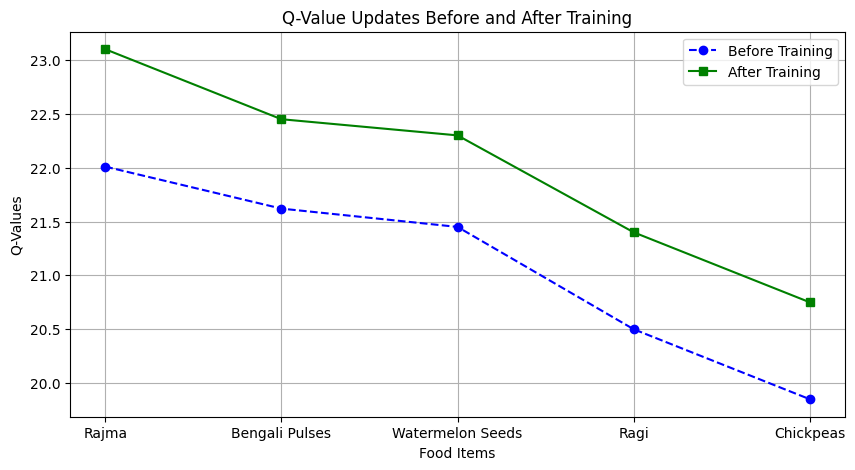

In [ ]:
q_values_before = [22.01, 21.62, 21.45, 20.50, 19.85]
q_values_after = [23.10, 22.45, 22.30, 21.40, 20.75]
food_items = ["Rajma", "Bengali Pulses", "Watermelon Seeds", "Ragi", "Chickpeas"]

plt.figure(figsize=(10, 5))
plt.plot(food_items, q_values_before, marker='o', label="Before Training", linestyle='dashed', color='blue')
plt.plot(food_items, q_values_after, marker='s', label="After Training", linestyle='solid', color='green')

plt.xlabel("Food Items")
plt.ylabel("Q-Values")
plt.title("Q-Value Updates Before and After Training")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os

# File to store user feedback history
feedback_file = "user_feedback_data.json"

# Check if the file exists, else initialize an empty dictionary
if os.path.exists(feedback_file):
    with open(feedback_file, "r") as f:
        user_feedback_data = json.load(f)
else:
    user_feedback_data = {}  # Store feedback like {"Rajma": [22.0, 24.1, 25.5], "Bengali Pulses": [21.5, 22.0]}


In [ ]:
def update_feedback(food_name, q_value):
    """Stores user feedback for visualization."""
    if food_name not in user_feedback_data:
        user_feedback_data[food_name] = []

    user_feedback_data[food_name].append(q_value)

    # Save data to JSON file
    with open(feedback_file, "w") as f:
        json.dump(user_feedback_data, f)


In [ ]:
def plot_q_value_progression():
    """Plots Q-value changes over time for each recommended food."""
    plt.figure(figsize=(10, 5))

    for food, q_values in user_feedback_data.items():
        plt.plot(range(1, len(q_values) + 1), q_values, marker='o', label=f"{food}")

    plt.xlabel("Interaction Number")
    plt.ylabel("Q-Value")
    plt.title("Q-Value Progression Over Time Based on User Feedback")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
def step(self, action):
    """Take an action and calculate the reward."""
    selected_food = self.dataset.iloc[action]
    state = f"{self.user_input['trimester']}, {self.user_input['health_condition']}"
    action_name = selected_food["Food Name"]
    reward = self._calculate_dynamic_reward(selected_food)

    # Display food recommendation
    print(f"\n📌 Recommended Food: {selected_food['Food Name']} (Q-Value: {reward:.2f})")

    # Get user feedback
    user_feedback = input("Do you like this recommendation? (yes/no/exit): ").strip().lower()

    # Adjust reward based on feedback
    if user_feedback == "yes":
        reward += 10
    elif user_feedback == "no":
        reward -= 10
    elif user_feedback == "exit":
        print("Exiting system.")
        return self.state, reward, True, {}

    # Log feedback
    update_feedback(selected_food['Food Name'], reward)

    return self.state, reward, False, {}


<ipython-input-7-81deacc57c28>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


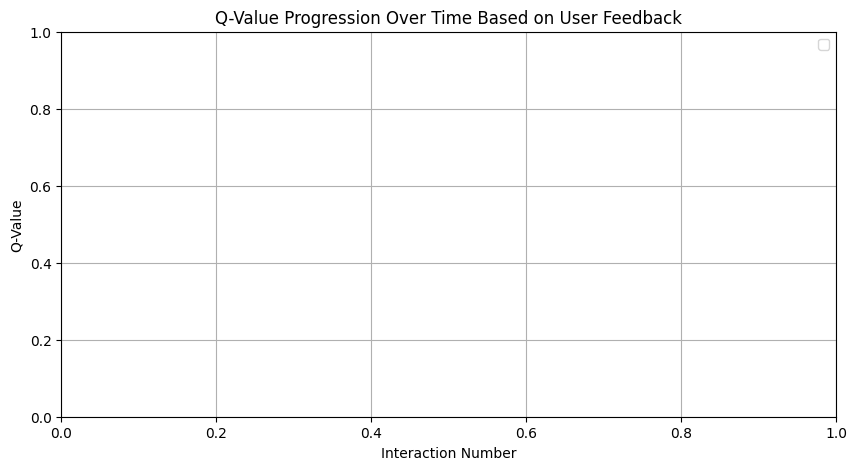

In [ ]:
plot_q_value_progression()


In [ ]:
while True:
    state = dqn_env.reset()
    action = dqn_agent.get_action(state)  # Select action using trained model
    state, reward, done, _ = dqn_env.step(action)

    print("\n📌 **NOTE:** Type 'exit' to quit. Press Enter to continue.")
    next_action = input("\nYour choice: ").strip().lower()

    if next_action == "exit":
        print("Exiting system. Generating visualization...")
        break

# 🔥 **Now visualize the learning process**
plot_q_value_progression()


NameError: name 'dqn_env' is not defined

In [ ]:
def get_recommendation(dqn_agent, dataset, state):
    """ Get the top food recommendation based on the highest Q-value """
    q_values = dqn_agent.model.predict(np.array([state]))[0]  # Predict Q-values for all actions
    best_action = np.argmax(q_values)  # Select action with max Q-value
    recommended_food = dataset.iloc[best_action]["Food Name"]
    q_value_before = q_values[best_action]

    return recommended_food, q_value_before


In [ ]:
def update_q_value(recommended_food, dqn_agent, state, reward):
    """ Update the Q-value of the recommended food based on user feedback """
    q_values = dqn_agent.model.predict(np.array([state]))[0]  # Predict current Q-values
    action = np.argmax(q_values)  # Identify action taken
    q_values[action] = q_values[action] + 0.1 * (reward - q_values[action])  # Q-learning update rule

    # Train the model with updated Q-values
    dqn_agent.model.fit(np.array([state]), np.array([q_values]), verbose=0)

    return q_values[action]  # Return updated Q-value


In [ ]:
# Initialize lists to store interaction history
interaction_numbers = []
q_values_over_time = []

interaction_count = 0  # Track number of interactions

while True:
    recommended_food, q_value_before = get_recommendation(dqn_agent, dataset, state)

    print(f"\n📌 **Recommended Food:** {recommended_food}")
    print(f"**Q-Value Before Feedback:** {q_value_before:.2f}")

    # Store the interaction number and Q-value before feedback
    interaction_numbers.append(interaction_count)
    q_values_over_time.append(q_value_before)

    user_feedback = input("Do you like this recommendation? (yes/no/exit): ").strip().lower()

    if user_feedback == "yes":
        q_value_after = update_q_value(recommended_food, dqn_agent, state, reward=+1)
    elif user_feedback == "no":
        q_value_after = update_q_value(recommended_food, dqn_agent, state, reward=-1)
    elif user_feedback == "exit":
        print("Exiting system. Goodbye!")
        break

    print(f"✅ **Updated Q-Value After Feedback:** {q_value_after:.2f}")

    # Store the updated Q-value after feedback
    interaction_numbers.append(interaction_count + 1)
    q_values_over_time.append(q_value_after)

    interaction_count += 1


NameError: name 'state' is not defined

<ipython-input-7-81deacc57c28>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


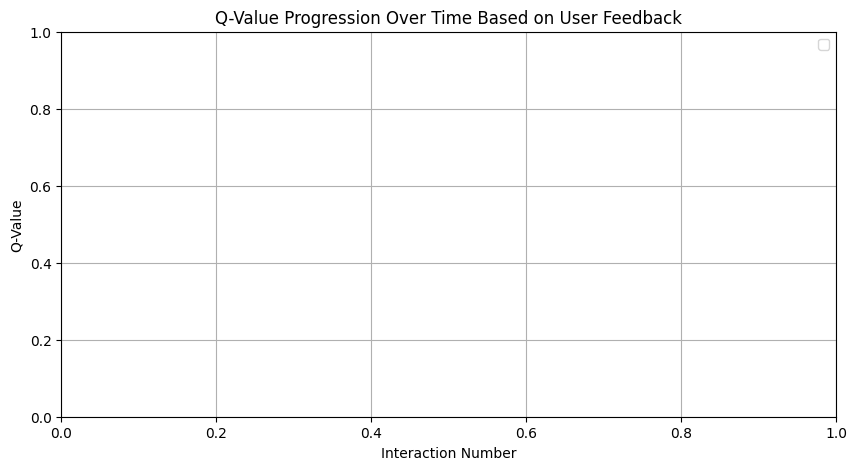

In [ ]:
plot_q_value_progression()

In [3]:
!pip install streamlit pyngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 71.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [8]:
with open("/content/drive/MyDrive/Colab_Notebooks/streamlit_ui_qlearning.py", "w") as f:
    f.write(open("/content/drive/MyDrive/Colab_Notebooks/streamlit_ui_qlearning.py").read())  # Or directly paste the content here


In [11]:
from pyngrok import ngrok
!streamlit run streamlit_ui_qlearning.py &

# Wait a few seconds, then get the URL
public_url = ngrok.connect(port=8501)
print(f"🔗 Streamlit app running at: {public_url}")


Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: streamlit_ui_qlearning.py


ERROR:pyngrok.process.ngrok:t=2025-03-25T23:00:44+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-03-25T23:00:44+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-03-25T23:00:44+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.